In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns


In [2]:
df = pd.read_csv("Road Accident Data.csv")



In [3]:
df

,All Insites,Accident Date,Month,Year,Day_of_Week,Junction_Control,Junction_Detail,Accident_Severity,Latitude,Light_Conditions,...,Number_of_Casualties,Number_of_Vehicles,Police_Force,Road_Surface_Conditions,Road_Type,Speed_limit,Time,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
0,200901BS70001,1/1/2021,January,2021,Thursday,Give way or uncontrolled,T or staggered junction,Serious,51.512273,Daylight,...,1,2,Metropolitan Police,Dry,One way street,30,15:11,Urban,Fine no high winds,Car
1,200901BS70002,1/5/2021,January,2021,Monday,Give way or uncontrolled,Crossroads,Serious,51.514399,Daylight,...,11,2,Metropolitan Police,Wet or damp,Single carriageway,30,10:59,Urban,Fine no high winds,Taxi/Private hire car
2,200901BS70003,1/4/2021,January,2021,Sunday,Give way or uncontrolled,T or staggered junction,Slight,51.486668,Daylight,...,1,2,Metropolitan Police,Dry,Single carriageway,30,14:19,Urban,Fine no high winds,Taxi/Private hire car
3,200901BS70004,1/5/2021,January,2021,Monday,Auto traffic signal,T or staggered junction,Serious,51.507804,Daylight,...,1,2,Metropolitan Police,Frost or ice,Single carriageway,30,8:10,Urban,Other,Motorcycle over 500cc
4,200901BS70005,1/6/2021,January,2021,Tuesday,Auto traffic signal,Crossroads,Serious,51.482076,Darkness - lights lit,...,1,2,Metropolitan Police,Dry,Single carriageway,30,17:25,Urban,Fine no high winds,Car
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13078,200901QK50640,11/3/2021,November,2021,Tuesday,Give way or uncontrolled,T or staggered junction,Slight,51.553021,Daylight,...,1,3,Metropolitan Police,Dry,Single carriageway,30,18:40,Urban,Fine no high winds,Car
13079,200901QK50641,11/10/2021,November,2021,Tuesday,Data missing or out of range,Not at junction or within 20 metres,Slight,51.552085,Daylight,...,1,1,Metropolitan Police,Dry,Single carriageway,30,19:40,Urban,Fine no high winds,Car
13080,200901QK50642,11/19/2021,November,2021,Thursday,Data missing or out of range,Not at junction or within 20 metres,Slight,51.560697,Daylight,...,1,2,Metropolitan Police,Dry,Single carriageway,30,15:48,Urban,Fine no high winds,Car
13081,200901QK50643,11/12/2021,November,2021,Thursday,Give way or uncontrolled,Crossroads,Slight,51.585821,Darkness - lights lit,...,1,2,Metropolitan Police,Dry,Single carriageway,30,22:26,Urban,Fine no high winds,Car


# Cleaning and Null Handling

In [4]:
df.dtypes


All Insites                    object
Accident Date                  object
Month                          object
Year                            int64
Day_of_Week                    object
Junction_Control               object
Junction_Detail                object
Accident_Severity              object
Latitude                      float64
Light_Conditions               object
Local_Authority_(District)     object
Carriageway_Hazards            object
Longitude                     float64
Number_of_Casualties            int64
Number_of_Vehicles              int64
Police_Force                   object
Road_Surface_Conditions        object
Road_Type                      object
Speed_limit                     int64
Time                           object
Urban_or_Rural_Area            object
Weather_Conditions             object
Vehicle_Type                   object
dtype: object

In [5]:
df.isnull().sum()


All Insites                       0
Accident Date                     0
Month                             0
Year                              0
Day_of_Week                       0
Junction_Control                  0
Junction_Detail                   0
Accident_Severity                 0
Latitude                          0
Light_Conditions                  0
Local_Authority_(District)        0
Carriageway_Hazards           12981
Longitude                         0
Number_of_Casualties              0
Number_of_Vehicles                0
Police_Force                      0
Road_Surface_Conditions           0
Road_Type                         4
Speed_limit                       0
Time                              0
Urban_or_Rural_Area               0
Weather_Conditions               59
Vehicle_Type                      0
dtype: int64

In [6]:
df.shape

(13083, 23)

In [7]:
df["Road_Surface_Conditions"]=df["Road_Surface_Conditions"].fillna(df["Road_Surface_Conditions"].mode()[0])
df["Road_Type"]=df["Road_Type"].fillna(df["Road_Type"].mode()[0])
df["Weather_Conditions"]=df["Weather_Conditions"].fillna(df["Weather_Conditions"].mode()[0])

In [8]:
df['Time'].dropna(inplace=True)

In [9]:
df = df.drop(["Carriageway_Hazards", "All Insites","Accident Date"], axis=1)


           

In [10]:
df.isnull().sum()

Month                         0
Year                          0
Day_of_Week                   0
Junction_Control              0
Junction_Detail               0
Accident_Severity             0
Latitude                      0
Light_Conditions              0
Local_Authority_(District)    0
Longitude                     0
Number_of_Casualties          0
Number_of_Vehicles            0
Police_Force                  0
Road_Surface_Conditions       0
Road_Type                     0
Speed_limit                   0
Time                          0
Urban_or_Rural_Area           0
Weather_Conditions            0
Vehicle_Type                  0
dtype: int64

In [11]:
for i in df.columns:
    print(i,df[i].sort_values().unique(),"\n",sep = "\n")

Month
['April' 'August' 'December' 'February' 'January' 'July' 'June' 'March'
 'May' 'November' 'October' 'September']


Year
[2021]


Day_of_Week
['Friday' 'Monday' 'Saturday' 'Sunday' 'Thursday' 'Tuesday' 'Wednesday']


Junction_Control
['Authorised person' 'Auto traffic signal' 'Data missing or out of range'
 'Give way or uncontrolled' 'Stop sign']


Junction_Detail
['Crossroads' 'Mini-roundabout' 'More than 4 arms (not roundabout)'
 'Not at junction or within 20 metres' 'Other junction'
 'Private drive or entrance' 'Roundabout' 'Slip road'
 'T or staggered junction']


Accident_Severity
['Fatal' 'Serious' 'Slight']


Latitude
[51.298189 51.300312 51.308357 ... 51.642463 51.643466 51.645885]


Light_Conditions
['Darkness - lighting unknown' 'Darkness - lights lit'
 'Darkness - lights unlit' 'Darkness - no lighting' 'Daylight']


Local_Authority_(District)
['Barking and Dagenham' 'Barnet' 'Bexley' 'Brent' 'Bromley' 'Camden'
 'City of London' 'Croydon' 'Ealing' 'Greenwich' 'Hackney'
 

In [12]:
df["Weather_Conditions"] = df["Weather_Conditions"].str.replace("+", "and")


# Exploratory Data Analysis

In [13]:
df.columns

Index(['Month', 'Year', 'Day_of_Week', 'Junction_Control', 'Junction_Detail',
       'Accident_Severity', 'Latitude', 'Light_Conditions',
       'Local_Authority_(District)', 'Longitude', 'Number_of_Casualties',
       'Number_of_Vehicles', 'Police_Force', 'Road_Surface_Conditions',
       'Road_Type', 'Speed_limit', 'Time', 'Urban_or_Rural_Area',
       'Weather_Conditions', 'Vehicle_Type'],
      dtype='object')

# Number of Accident Seriverity Level 

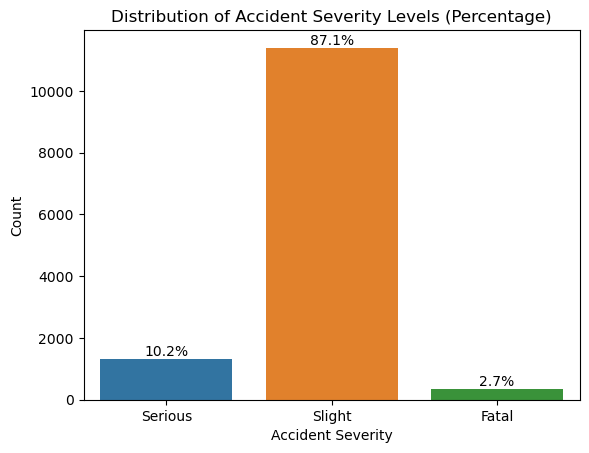

In [14]:
ax = sns.countplot(x='Accident_Severity', data=df)
total = len(df)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='bottom')
ax.set_xlabel('Accident Severity')
ax.set_ylabel('Count')
ax.set_title('Distribution of Accident Severity Levels (Percentage)')

plt.show()


Number of Slight  cases  is very high approx 85.5%  and Fatal approx 1.3%

# Number of accident severity according to speed_limit

Text(0.5, 1.0, 'Count of Accident Severity by Speed Limit')

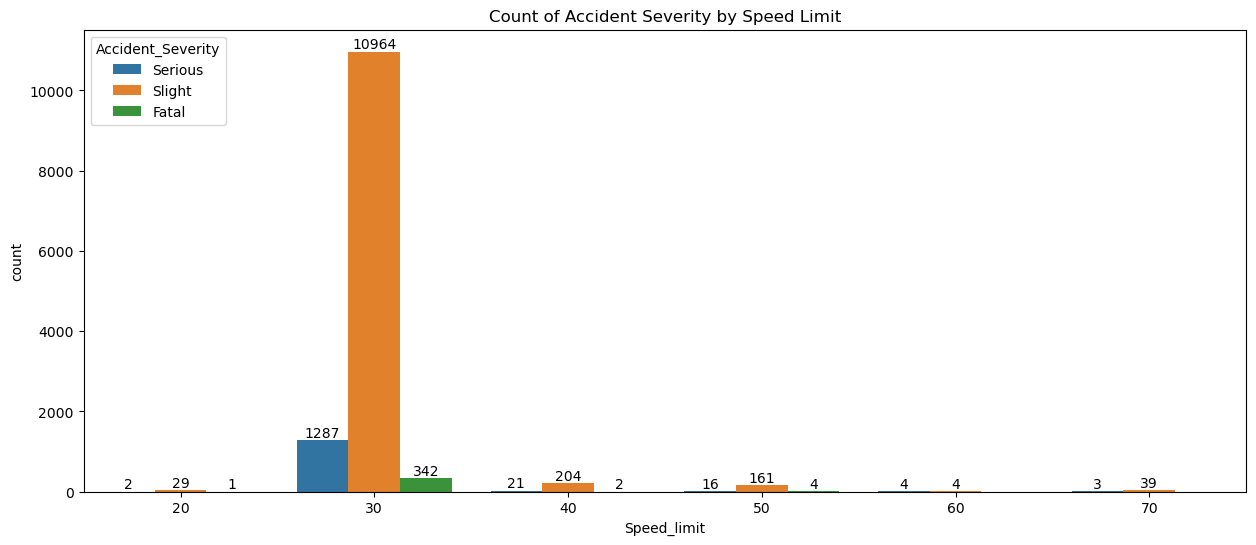

In [15]:
plt.figure(figsize=(15, 6))
ax = sns.countplot(data=df,x='Speed_limit',hue='Accident_Severity')

for bars in ax.containers:
    ax.bar_label(bars)    
ax.set_title('Count of Accident Severity by Speed Limit')

Most number Fatal,serivous and slight  casses  are happend when speed_limit is   30 and 60   KMPH  


# Number of accident according to region(precentage)

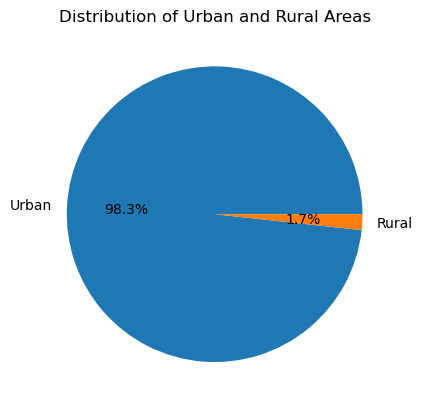

In [16]:
urban_rural_counts = df['Urban_or_Rural_Area'].value_counts()

plt.pie(urban_rural_counts, labels=urban_rural_counts.index, autopct='%1.1f%%')
plt.title('Distribution of Urban and Rural Areas')

plt.show()

Urban Area is the greater Count of accident as compare to rural

# Count of Accident Severity by Region

Text(0.5, 1.0, 'Count of Accident Severity by Region')

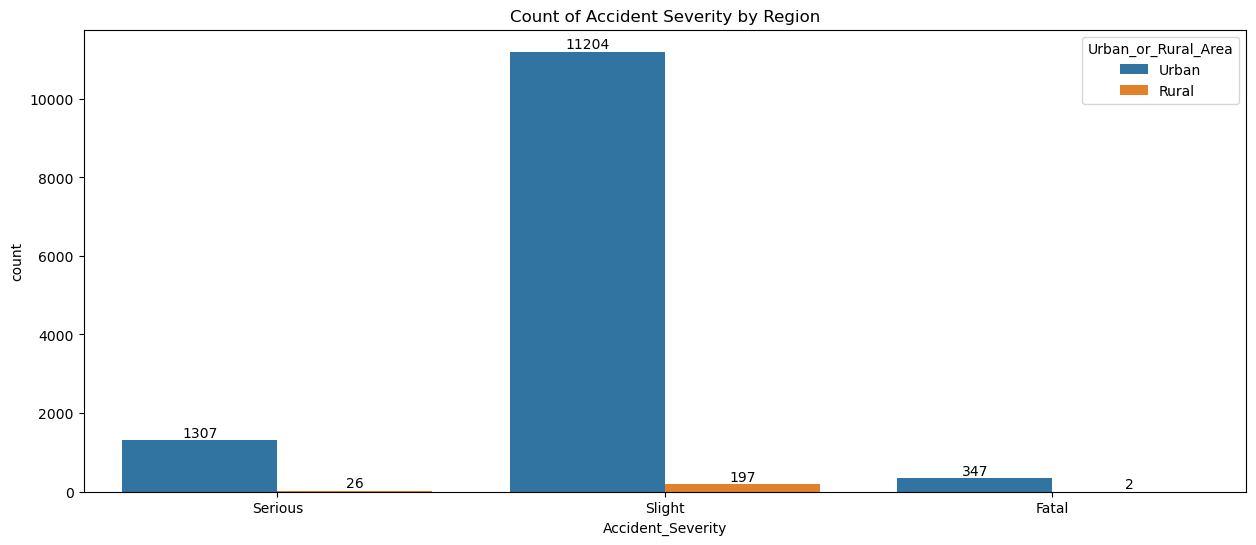

In [17]:
plt.figure(figsize=(15, 6))
ax = sns.countplot(data=df,x='Accident_Severity',hue='Urban_or_Rural_Area')

for bars in ax.containers:
    ax.bar_label(bars)    
ax.set_title('Count of Accident Severity by Region')

Most of The Fatal Type of cases are hapend in rural areas

# number of accidents over different years

In [18]:
monthly_counts=df.groupby(["Year","Month"]).size().reset_index(name="Count")

OptionError: "No such keys(s): 'mode.use_inf_as_null'"

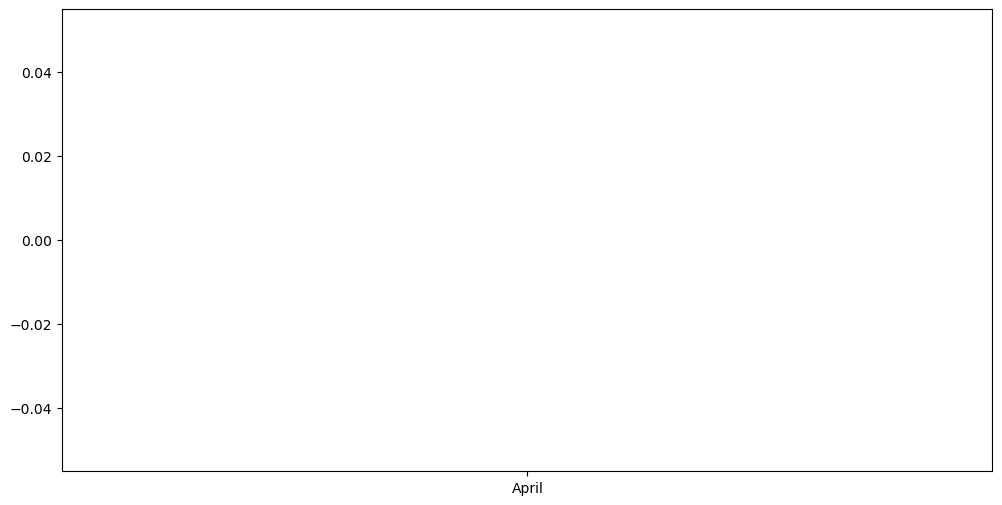

In [19]:
plt.figure(figsize=(12,6))
sns.lineplot(data=monthly_counts,x="Month",y="Count",hue="Year",marker="o")
plt.title("Distribution of accident Month by Year")

# correlation between the number of casualties and the number of vehicles involved in an accident

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter( df['Number_of_Vehicles'], df['Number_of_Casualties'], alpha=0.5)
plt.title('Number of Casualties vs Number of Vehicles')
plt.grid(True)



# Count of Accident  by Vechicle_type

In [ ]:
plt.figure(figsize=(15, 6))
ax = sns.countplot(data=df, y='Vehicle_Type', order=df['Vehicle_Type'].value_counts().head(15).index)

for bars in ax.containers:
    ax.bar_label(bars)    
ax.set_title('Count of Accident by Vechical_type')

# Total Number of Casualties by Vechical Type

In [ ]:
plt.figure(figsize=(10, 6))
total_cas=df.groupby(["Vehicle_Type"],as_index=False)["Number_of_Casualties"].sum().sort_values(by="Number_of_Casualties",ascending=False).head(15)
ax=sns.barplot(x="Number_of_Casualties", y="Vehicle_Type", data=total_cas, orient="h")
plt.title('Total Number of Casualties by Vehicle Type')
for bars in ax.containers:
    ax.bar_label(bars) 


# identify any significant relationships between road characteristics (junction detail, speed limit, junction control) and accident severity

In [ ]:
from scipy.stats import chi2_contingency
contingency_table = pd.crosstab(index=df['Accident_Severity'], columns=[df['Junction_Detail'], df['Speed_limit'], df['Junction_Control']])
chi2, p_value, dof, expected = chi2_contingency(contingency_table)
print("Chi-square test statistic:", chi2)
print("p-value:", p_value)
print("Degrees of freedom:", dof)


# Total Number of accident by Road Surface Conditions in different region

In [ ]:
ax=sns.countplot(x='Road_Surface_Conditions',data=df,hue='Urban_or_Rural_Area')
plt.title('Total Number of accident by Road Surface Conditions ')
for bars in ax.containers:
    ax.bar_label(bars)

# Total Number of accident by Light Conditions in different Accident_Severity

In [ ]:
plt.figure(figsize=(15, 6))
ax=sns.countplot(x='Light_Conditions',data=df,hue="Accident_Severity")
plt.title('Total Number of accident by Light Conditions ')
for bars in ax.containers:
    ax.bar_label(bars) 


# Number_of_Casualties vary across different local authorities (districts)

In [ ]:
plt.figure(figsize=(10, 6))
total_cas=df.groupby(["Local_Authority_(District)"],as_index=False)["Number_of_Casualties"].sum().sort_values(by="Number_of_Casualties",ascending=False).head(10)
ax=sns.barplot(x="Number_of_Casualties", y="Local_Authority_(District)", data=total_cas, orient="h")
plt.title('Total Number of Casualties by districts')
for bars in ax.containers:
    ax.bar_label(bars) 

# Are there specific times of the day when accidents are more likely to occur

In [ ]:
ax = sns.countplot(x='Day_of_Week', data=df)

In [ ]:
df.columns

# Total Number of accident in different Junction_Control

In [ ]:
plt.figure(figsize=(15, 6))
ax=sns.countplot(x='Junction_Control',data=df)
plt.title('Total Number of accident in different Junction_Control ')
for bars in ax.containers:
    ax.bar_label(bars) 

# Top 10 Total Number of accident in different police Force Control

In [ ]:
ax = sns.countplot(data=df, y='Police_Force', order=df['Police_Force'].value_counts().head(10).index)
plt.title('Total Number of accident in different police Force Control ')
for bars in ax.containers:
    ax.bar_label(bars) 

# create the correlation heatmap

In [ ]:
numerical_cols = df.select_dtypes(include='number')
correlation_matrix = numerical_cols.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()


# predict accident severity based on various factors such as weather conditions, road type, or vehicle type using machine learning

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder

In [ ]:
features = ['Weather_Conditions', 'Road_Type', 'Vehicle_Type',"Urban_or_Rural_Area",'Junction_Control']
target = 'Accident_Severity'

In [ ]:
label_encoder = LabelEncoder()

In [ ]:
for feature in features:
    df[feature] = label_encoder.fit_transform(df[feature])

In [ ]:
X = df[features]
y = df[target]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = RandomForestClassifier()

In [ ]:
model.fit(X_train, y_train)

In [ ]:
y_pred = model.predict(X_test)
y_pred

In [ ]:
report = classification_report(y_test, y_pred)
print(report)